In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from env import sql_connexion
import env

import acquire


# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

In [2]:
# obtaining the Zillow 2017 dataset for single-family homes

# zil = acquire.get_zillow_data(env.sql_connexion)


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusetypeid
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0,261.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0,261.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,261.0


In [63]:
# now obtaining the data from the created .csv because SQL is taking too long on my internet.

zil = pd.read_csv('properties_singlefam_2017.csv')

In [64]:
zil.head()

,Unnamed: 0,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusetypeid
0,0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0,261.0
1,1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
2,2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
3,3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0,261.0
4,4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,261.0


In [3]:
# zil.to_csv('zillow_single_family_properties_2017.csv')

# converting to csv -- marking out this cell to avoid re-saving the file each time that I run the notebook

In [35]:
zil.shape

# seeing the size of the dataframe

(2140235, 8)

In [40]:
zil.info()

# getting info on the unmanipulated dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 9 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   bedroomcnt                    float64
 2   bathroomcnt                   float64
 3   calculatedfinishedsquarefeet  float64
 4   taxvaluedollarcnt             float64
 5   yearbuilt                     float64
 6   taxamount                     float64
 7   fips                          float64
 8   propertylandusetypeid         float64
dtypes: float64(8), int64(1)
memory usage: 147.8 MB


In [41]:
zil.columns

#looking at columns
# will have to drop 'Unnamed: 0'

Index(['Unnamed: 0', 'bedroomcnt', 'bathroomcnt',
       'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'yearbuilt',
       'taxamount', 'fips', 'propertylandusetypeid'],
      dtype='object')

In [42]:
zil.isna().sum()

#checking nulls in each column

Unnamed: 0                         0
bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
propertylandusetypeid              0
dtype: int64

In [8]:
zil.columns[zil.isnull().any()]

# find column names with nulls

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount'],
      dtype='object')

In [9]:
# look at frequencies of each value in bedroomcnt

zil.bedroomcnt.value_counts()

# 3- and 4-br houses the most popular by far.

3.0     964298
4.0     634289
2.0     335473
5.0     150866
6.0      25166
1.0      23166
0.0      13187
7.0       4807
8.0       1107
9.0        291
10.0       121
11.0        34
13.0        16
12.0        12
14.0         7
15.0         6
18.0         3
16.0         2
25.0         1
Name: bedroomcnt, dtype: int64

In [10]:
zil.yearbuilt.value_counts()

# years built range from 1801 to 2016

1955.0    84405
1950.0    71693
1954.0    69163
1953.0    62342
1956.0    61942
1951.0    53355
1964.0    52428
1952.0    50726
1947.0    46817
1948.0    45433
1963.0    44211
1949.0    43182
1959.0    43118
1957.0    43023
1962.0    42680
1965.0    40895
1960.0    38014
1961.0    35347
1958.0    34230
1977.0    32718
1976.0    30650
1968.0    27898
1972.0    27698
1941.0    27086
1989.0    27064
1969.0    26945
1973.0    26611
1971.0    26126
1940.0    26030
1978.0    25766
1987.0    25318
1979.0    24290
1966.0    23752
1923.0    21981
1924.0    21535
1939.0    20775
1990.0    20761
1986.0    20320
1970.0    20306
1925.0    20183
1926.0    18561
1946.0    18293
1985.0    17761
1988.0    17697
1974.0    17660
1967.0    17207
1980.0    16630
1975.0    16096
1942.0    16016
1922.0    15853
1938.0    15553
1984.0    14977
2001.0    14786
2000.0    14586
1927.0    14539
1999.0    14446
1928.0    14115
2005.0    13858
1944.0    13380
2003.0    13262
1998.0    12648
1994.0    12601
1937.0  

In [46]:
# dropping nulls because they're a small percentage of the overall data 

zil = zil.dropna()
zil.head()

,Unnamed: 0,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusetypeid
4,4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,261.0
6,6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0,261.0
7,7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0,261.0
11,11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0,261.0
14,14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0,261.0


**Null values consisted of less than 1.06pc of all entries, so the nulls were dropped.**

In [47]:
(zil.bedroomcnt == 0).value_counts()

# 4397 houses have a bedroom count of 0 -- perhaps they're studios ?


False    2135838
True        4397
Name: bedroomcnt, dtype: int64

In [48]:
# # but what about houses with no bathrooms ?

(zil.bathroomcnt == 0).value_counts()

# # 4274 with no bathroom

False    2135961
True        4274
Name: bathroomcnt, dtype: int64

In [49]:
(zil.calculatedfinishedsquarefeet < 10).value_counts()


# all houses have a sq-footage, but 16 have a square footage of less than 16

False    2140219
True          16
Name: calculatedfinishedsquarefeet, dtype: int64

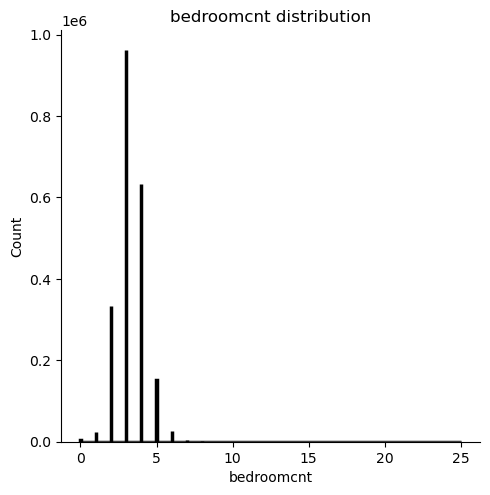

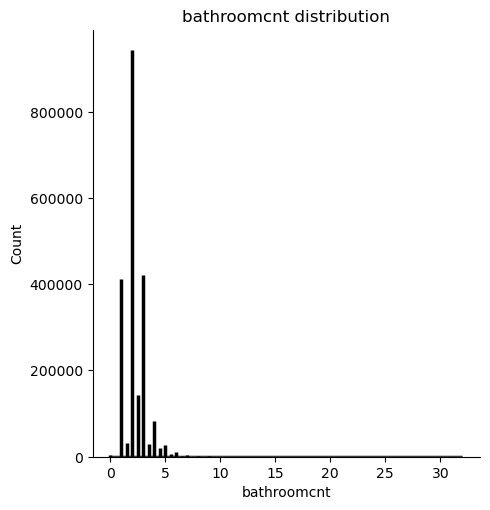

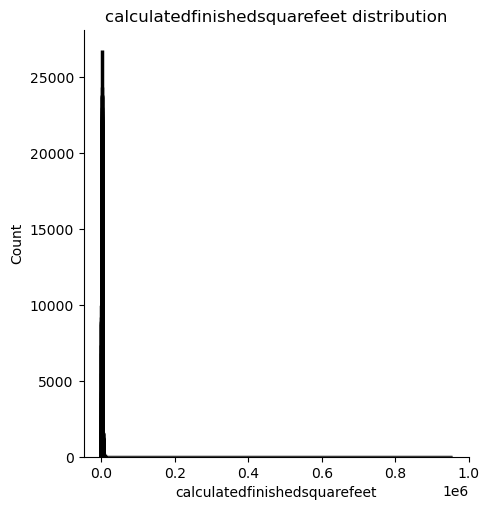

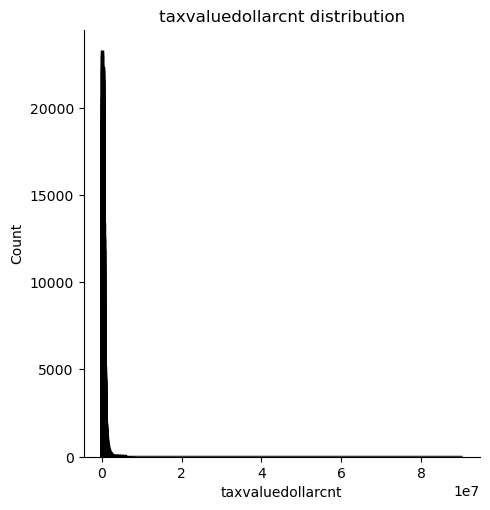

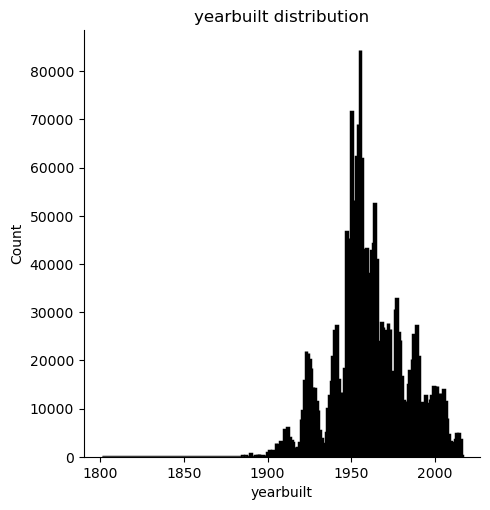

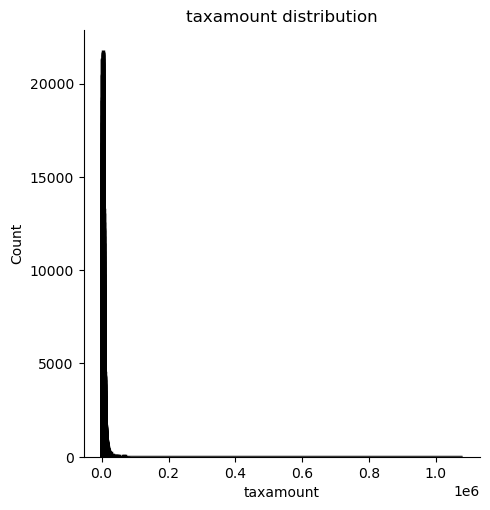

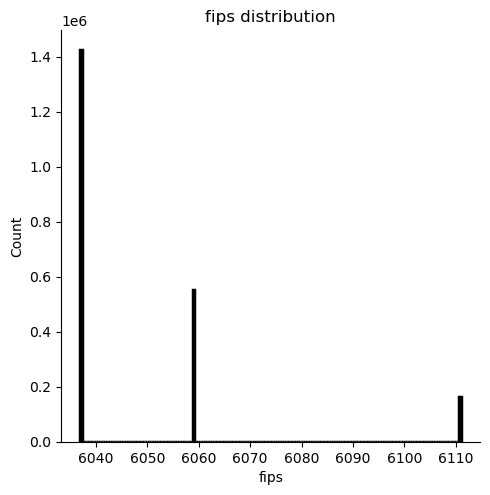

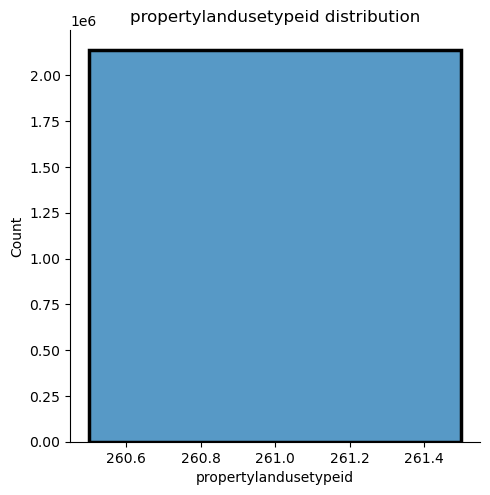

In [31]:
## visualising the data

for col in zil.columns:
    sns.displot(zil[col], palette = ['red', 'green'], linewidth=2.5)
    plt.title(f'{col} distribution')
    plt.show()
    


**The graphs show that there is a normal distribution for bedroomcnt, bathroomcnt and yearbuilt (peaking in the 1960s). Calculatedfinishedsquarefeet, taxvaluedollarcnt and taxamount are all very skewed distribution.**



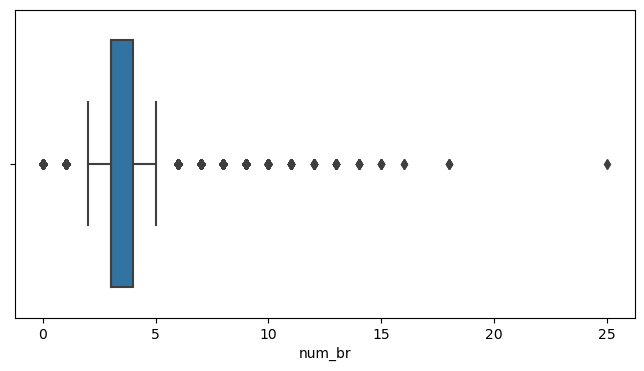

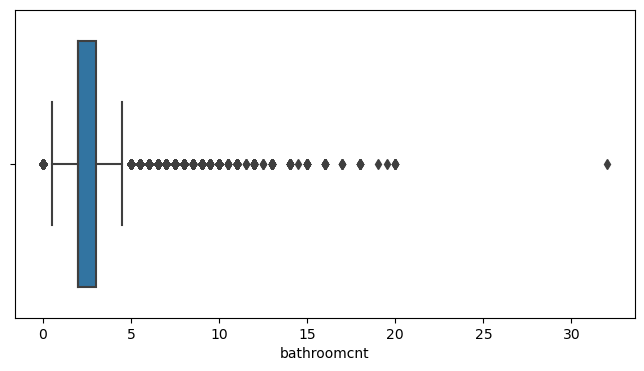

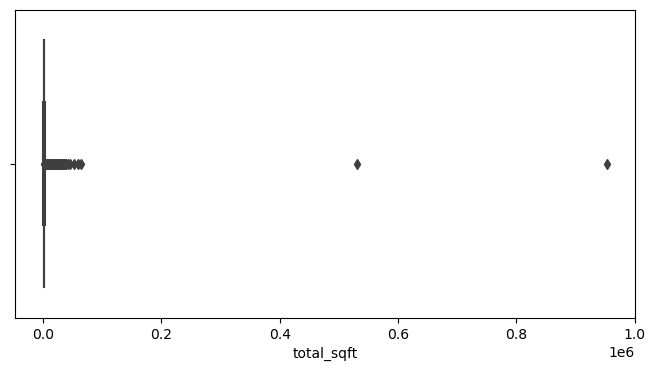

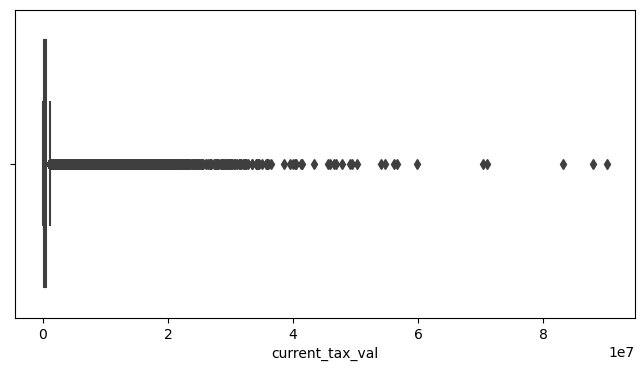

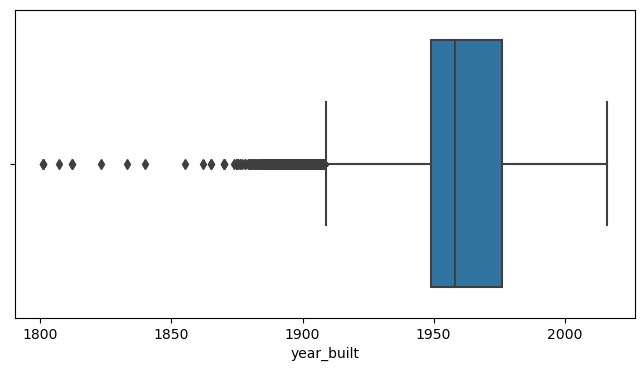

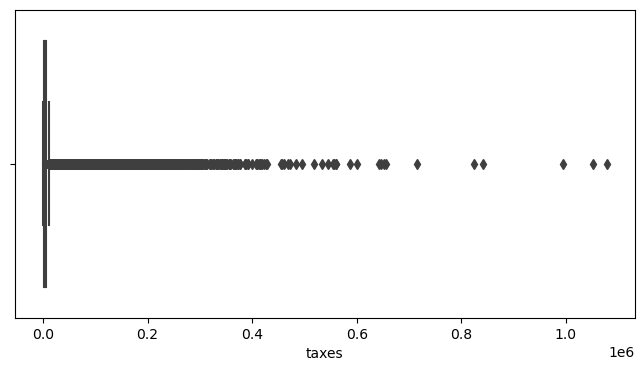

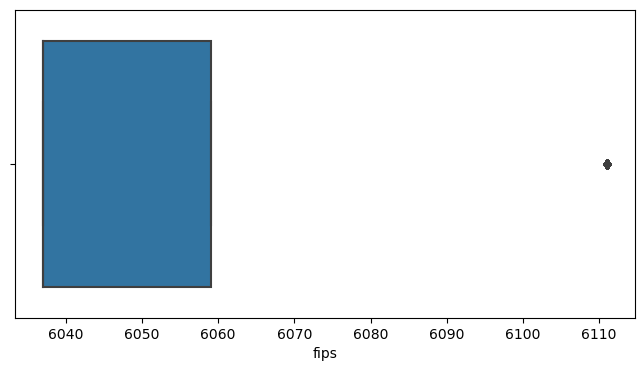

In [60]:
# Looking at boxplots of the data

for col in zil.columns:
    plt.figure(figsize = (8, 4))

    sns.boxplot(zil[col])
    plt.show()


**The data as shown in the boxplots appears just as concentrated around certain points as in the bar graphs.**

In [67]:
# renaming unsightly column names

zil = zil.rename(columns = {'bedroomcnt' : 'num_br', 'bathroomcnt' : 'num_ba', 
                            'calculatedfinishedsquarefeet' : 'total_sqft', 
                            'taxamount' : 'taxes', 'taxvaluedollarcnt' : 'current_tax_val', 
                            'yearbuilt' : 'year_built'})

In [68]:
zil.head()

,Unnamed: 0,num_br,num_ba,total_sqft,current_tax_val,year_built,taxes,fips,propertylandusetypeid
0,0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0,261.0
1,1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
2,2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
3,3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0,261.0
4,4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,261.0


**The columns 'propertylandusetypeid' (the column was used solely to retrieve the data from SQL, and is now superfluous) and 'Unnamed: 0' are unnecessary and will be dropped.**

In [69]:
# dropping unnecessary columns 'propertylandusetypeid' and 'Unnamed: 0'

zil = zil.drop(columns = ['propertylandusetypeid', 'Unnamed: 0'], axis = 0)
zil.head()

,num_br,num_ba,total_sqft,current_tax_val,year_built,taxes,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
